# MODULE 3

# Fundamental Analysis using Regression

# 3.1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("Gold.csv")

In [6]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [7]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693
511,"May 03, 2019",31341,31250,31500,31163,0.08K,0.44%,NaN,429.924911


In [8]:
df.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [9]:
df.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


In [10]:
df['Pred'].isnull().value_counts()

False    411
True     101
Name: Pred, dtype: int64

# Defining variables 

In [11]:
#To be used in training model.
x1=df.iloc[:,1:5]

In [12]:
x1

,Price,Open,High,Low
0,28060,28400,28482,28025
1,28184,28136,28382,28135
2,28119,28145,28255,28097
3,27981,28125,28192,27947
4,28007,28060,28146,27981
...,...,...,...,...
507,31868,31851,31934,31705
508,31625,31800,31824,31597
509,31563,31604,31657,31503
510,31203,31420,31425,31160


In [13]:
#to be used in training model
y1=df.iloc[:,-1]

In [14]:
y1=df['new']

In [15]:
y1

0      117.570740
1      295.430176
2      132.123714
3      101.298064
4      112.153318
          ...    
507    247.177322
508     52.201158
509    113.293305
510     48.365693
511    429.924911
Name: new, Length: 512, dtype: float64

In [16]:
y2=df.Pred.loc[:410]

In [17]:
y2

0      738.0
1     -146.0
2       30.0
3      357.0
4      124.0
       ...  
406    -31.0
407     72.0
408     35.0
409    669.0
410    521.0
Name: Pred, Length: 411, dtype: float64

In [18]:
x2=x1.loc[:410]

In [19]:
x2

,Price,Open,High,Low
0,28060,28400,28482,28025
1,28184,28136,28382,28135
2,28119,28145,28255,28097
3,27981,28125,28192,27947
4,28007,28060,28146,27981
...,...,...,...,...
406,30964,30874,31085,30874
407,30926,30830,30970,30825
408,31005,31039,31196,30974
409,31440,31011,31480,30941


# Applying Linear Regression on x1,y1

In [20]:
#Splitting data into training and test sets
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.1,random_state=0)


In [21]:
#training on dataset (training)

In [22]:
from sklearn.linear_model import LinearRegression
regressor_1=LinearRegression()

In [23]:
regressor_1.fit(x1_train,y1_train)

LinearRegression()

In [24]:
#saving our training model to a variable new

In [25]:
new=regressor_1.fit(x1_train,y1_train)

In [26]:
y1_pred=new.predict(x1_test)

In [27]:
y1_pred

array([ 79.00751094, 128.63189355, 301.55391032,  98.10465331,
        95.55575586, 170.27167917, 421.37366607,  38.80039327,
        70.73194526,  73.90255777, 194.95860567, 411.06418983,
       128.64227153, 225.73060044, 185.99474796, 171.32706236,
        89.17407849,  98.9935062 , 273.92187071,  68.57430882,
       251.15044279, 394.14632254,  78.83623561, 187.87210105,
       598.72963406, 104.24246571, 125.3860568 , 312.6342215 ,
       179.03485215,  99.82815057,  43.67605547, 366.18383859,
       151.91631436, 255.07534799, 407.58241769, 101.37948934,
        32.33297529, 276.73450514,  99.80444973, 107.61754028,
       155.7853197 , 132.03278413,  50.64517253,  17.00791776,
        39.50696226, 338.47555017, 312.74567281, 129.65510236,
        45.96050728, 295.44819218, 110.84772985, 163.33860695])

In [28]:
#calculations for r2 score

In [29]:
from sklearn.metrics import r2_score


In [30]:
r2_score(y1_test,y1_pred)

0.9999837212433824

# Checking correlations in df

In [31]:
df.corr()

,Price,Open,High,Low,Pred,new
Price,1.000000,0.989758,0.995125,0.996830,0.040489,0.164504
Open,0.989758,1.000000,0.995988,0.993992,0.109153,0.058551
High,0.995125,0.995988,1.000000,0.994194,0.080394,0.142109
Low,0.996830,0.993992,0.994194,1.000000,0.014411,0.091895
Pred,0.040489,0.109153,0.080394,0.014411,1.000000,-0.006109
new,0.164504,0.058551,0.142109,0.091895,-0.006109,1.000000


# After training the model using linear regression it seems pretty clear that df['new'] is linearly related with the coefficients.

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)


In [33]:
x2

,Price,Open,High,Low
0,28060,28400,28482,28025
1,28184,28136,28382,28135
2,28119,28145,28255,28097
3,27981,28125,28192,27947
4,28007,28060,28146,27981
...,...,...,...,...
406,30964,30874,31085,30874
407,30926,30830,30970,30825
408,31005,31039,31196,30974
409,31440,31011,31480,30941


In [34]:
x2=poly_reg.fit_transform(x2)

In [35]:
x2

array([[1.00000000e+00, 2.80600000e+04, 2.84000000e+04, ...,
        6.37136091e+17, 6.26913101e+17, 6.16854142e+17],
       [1.00000000e+00, 2.81840000e+04, 2.81360000e+04, ...,
        6.37646280e+17, 6.32097036e+17, 6.26596086e+17],
       [1.00000000e+00, 2.81190000e+04, 2.81450000e+04, ...,
        6.30246621e+17, 6.26722326e+17, 6.23217738e+17],
       ...,
       [1.00000000e+00, 3.10050000e+04, 3.10390000e+04, ...,
        9.33667865e+17, 9.27023607e+17, 9.20426632e+17],
       [1.00000000e+00, 3.14400000e+04, 3.10110000e+04, ...,
        9.48720181e+17, 9.32476211e+17, 9.16510370e+17],
       [1.00000000e+00, 3.18950000e+04, 3.14590000e+04, ...,
        1.00876255e+18, 9.91532234e+17, 9.74596220e+17]])

In [36]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.1,random_state=0)

In [37]:
regressor_2 = LinearRegression()
linear_regressor=regressor_2.fit(x2_train, y2_train)

In [38]:
y2_pred=regressor_2.predict(x2_test)

In [39]:
r2_score(y2_test,y2_pred)

0.9999718416604227

# Hence we get polynomial model efficiency of 99.9971841% ==99.99%

# Filling the blank data 

In [40]:
values=df.iloc[:,1:5].loc[411:]

In [41]:
values = poly_reg.fit_transform(values)

In [42]:
a = linear_regressor.predict(values)

In [43]:
a

array([ 853.2278927 ,  422.17206461,  529.8940838 ,  143.65878946,
        416.12016184, 1105.99518854,  400.3233555 ,  616.73675806,
          4.10463602,  546.63378412,  -27.52638739,  368.11662943,
        262.41706354,  616.40279276,  478.34446604,  413.44277078,
        487.43859369, 2997.76672251,  342.25736505,  273.25102121,
        473.51305658,  487.95258219,  -47.51078528,  363.97276956,
          7.29747278,  276.59475977,  281.69589884,  550.32391626,
        109.54169733,  414.1827038 ,  144.72268564,  241.32940943,
        411.71758158,  119.48475534,  408.36806757,  300.63205606,
        158.44859583,  686.01991159, 2018.82768137,  863.45073969,
        -34.64714926,  615.18851358,  468.9694317 ,  717.04008753,
        411.34256632,  256.28339273,  466.74369699,  260.45351297,
        108.19735224,  481.05128748,  242.50269968,  787.11537821,
        470.30290872,  558.03154642, -134.79421728,  232.20501215,
        614.16589243, 3029.99663431,  334.08079035, 3163.55363

In [48]:
df.dtypes

Date         object
Price         int64
Open          int64
High          int64
Low           int64
Vol.         object
Change %     object
Pred        float64
new         float64
dtype: object

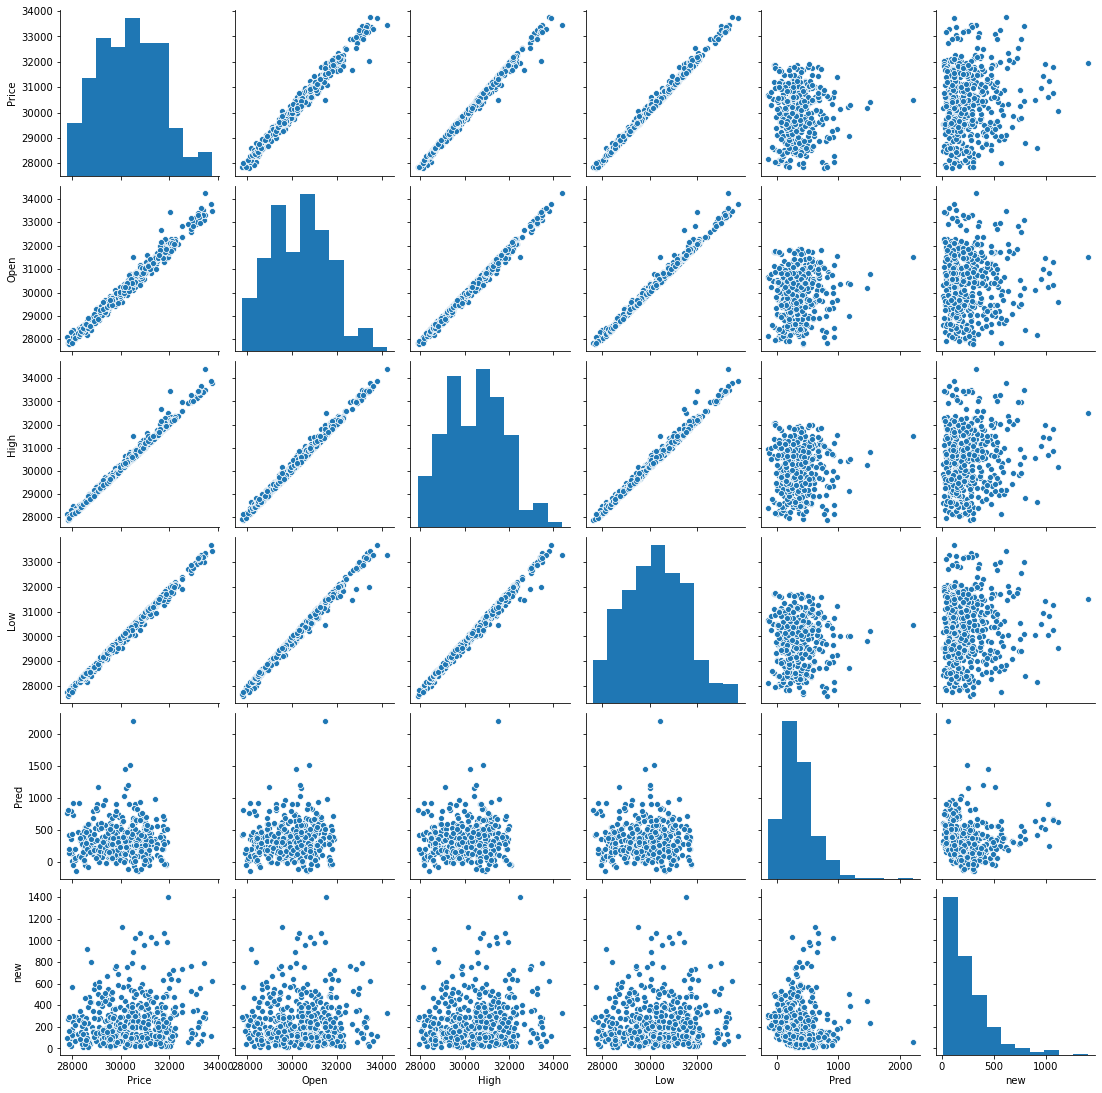

In [49]:
import seaborn as sns
sns.pairplot(df)

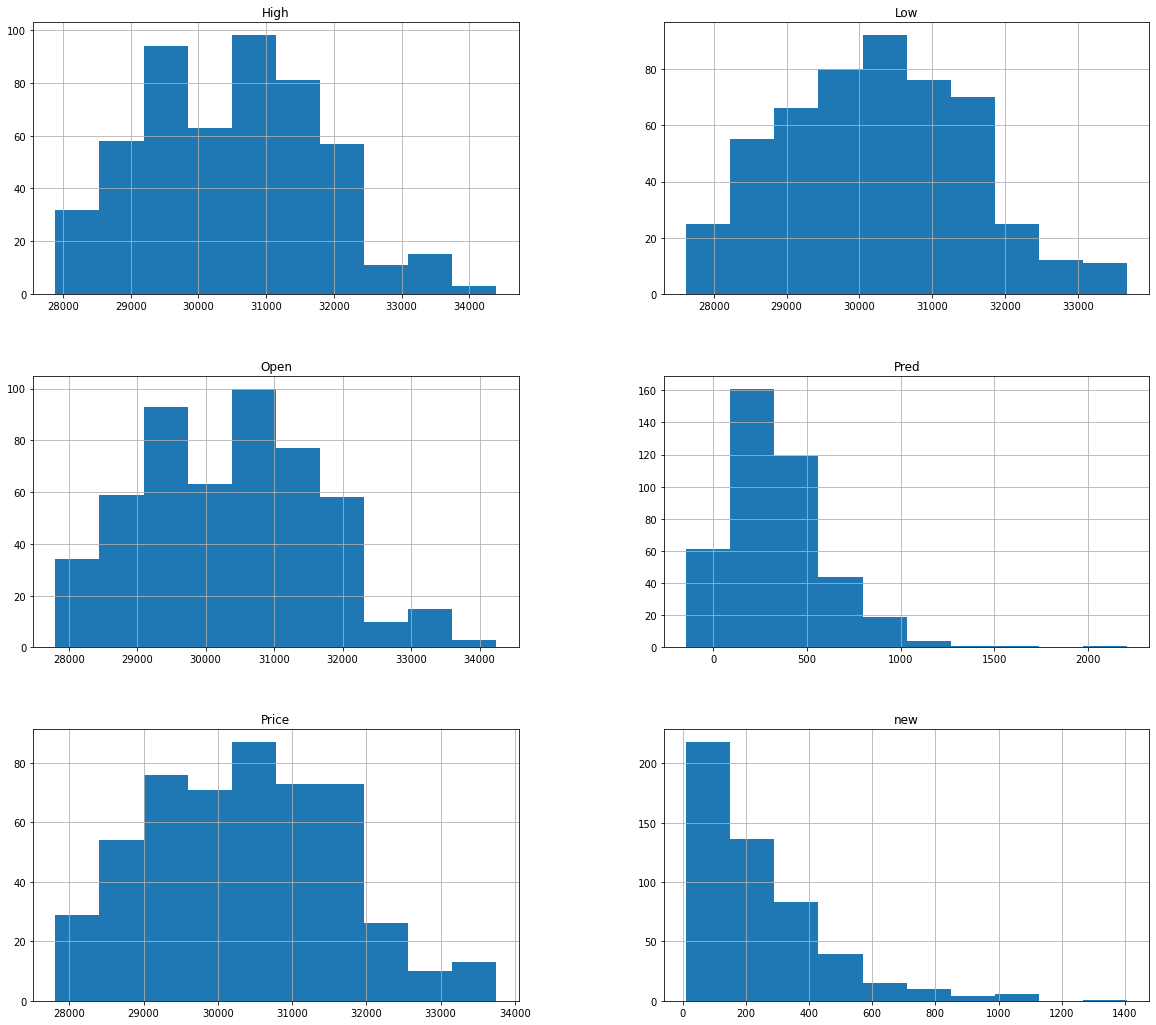

In [52]:
df.hist(figsize=(20,18))
plt.show()

In [53]:
#Importing nifty and stock of choice(GAIL).

In [54]:
df_nifty=pd.read_csv("Nifty50.csv")
df_gail=pd.read_csv("GAIL.csv")

In [55]:
df_nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [56]:
df_gail.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,GAIL,EQ,15-May-2017,409.20,413.05,415.25,410.00,413.80,414.00,412.83,1077551,4.448488e+08,22153,459059,42.60
1,GAIL,EQ,16-May-2017,414.00,415.80,416.00,410.25,411.00,411.40,412.85,2434834,1.005216e+09,46472,1771251,72.75
2,GAIL,EQ,17-May-2017,411.40,411.50,412.90,405.60,408.50,408.30,408.42,2002105,8.177070e+08,48972,1405319,70.19
3,GAIL,EQ,18-May-2017,408.30,406.35,409.00,401.50,403.00,404.75,407.03,2132140,8.678451e+08,39137,1405640,65.93
4,GAIL,EQ,19-May-2017,404.75,404.00,406.35,396.00,401.35,401.05,400.31,2847835,1.140022e+09,64928,1922275,67.50


In [57]:
df_nifty.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
count,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000
mean,10583.743016,10622.674291,10525.919939,10574.617308,2.648677e+08,13677.918806
std,570.074238,571.067477,563.662359,567.090953,9.739529e+07,4345.230980
min,9384.050000,9431.900000,9341.650000,9360.550000,3.108638e+07,1534.080000
25%,10177.975000,10225.237500,10125.050000,10166.887500,1.975549e+08,10493.917500
50%,10594.500000,10632.400000,10533.625000,10584.725000,2.421258e+08,12943.310000
75%,10897.762500,10937.700000,10840.762500,10892.812500,3.106006e+08,16118.212500
max,11856.150000,11856.150000,11738.500000,11787.150000,7.411532e+08,35131.190000


In [58]:
df_gail.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,4.940000e+02,494.000000,4.940000e+02,494.000000
mean,383.850607,384.526316,389.648887,378.495344,383.721964,383.694433,383.963198,4.086562e+06,1.555621e+09,62717.710526,2.124176e+06,51.658704
std,51.733753,52.239291,52.618520,51.600711,51.908285,51.773508,52.023177,2.634770e+06,1.002165e+09,29605.219108,1.568078e+06,11.205045
min,307.950000,309.750000,316.800000,295.250000,305.350000,307.950000,311.020000,1.706220e+05,7.407517e+07,2549.000000,4.794800e+04,20.690000
25%,343.350000,343.325000,347.850000,339.050000,343.062500,343.150000,343.047500,2.517473e+06,9.532118e+08,39904.500000,1.263764e+06,44.725000
50%,368.275000,369.250000,375.475000,363.125000,367.975000,368.100000,369.070000,3.457956e+06,1.288923e+09,58917.500000,1.772386e+06,52.085000
75%,414.000000,415.350000,418.587500,409.812500,413.600000,414.000000,412.977500,4.660488e+06,1.830825e+09,79859.500000,2.422976e+06,58.522500
max,511.200000,513.950000,519.500000,506.800000,514.500000,511.200000,510.670000,2.306700e+07,7.839240e+09,196705.000000,1.713214e+07,80.990000


# Modifying our datasets

In [67]:
df_nifty.Date=df_nifty.Date.astype('datetime64')

In [66]:
df_gail.Date=df_gail.Date.astype('datetime64')

In [69]:
df_nifty.dtypes

Date                 datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Shares Traded                 int64
Turnover (Rs. Cr)           float64
dtype: object

In [71]:
df_gail.dtypes

Symbol                            object
Series                            object
Date                      datetime64[ns]
Prev Close                       float64
Open Price                       float64
High Price                       float64
Low Price                        float64
Last Price                       float64
Close Price                      float64
Average Price                    float64
Total Traded Quantity              int64
Turnover                         float64
No. of Trades                      int64
Deliverable Qty                    int64
% Dly Qt to Traded Qty           float64
dtype: object

In [72]:
df_gail=df_gail[df_gail.Series=='EQ']

In [73]:
df_gail

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,GAIL,EQ,2017-05-15,409.20,413.05,415.25,410.00,413.80,414.00,412.83,1077551,4.448488e+08,22153,459059,42.60
1,GAIL,EQ,2017-05-16,414.00,415.80,416.00,410.25,411.00,411.40,412.85,2434834,1.005216e+09,46472,1771251,72.75
2,GAIL,EQ,2017-05-17,411.40,411.50,412.90,405.60,408.50,408.30,408.42,2002105,8.177070e+08,48972,1405319,70.19
3,GAIL,EQ,2017-05-18,408.30,406.35,409.00,401.50,403.00,404.75,407.03,2132140,8.678451e+08,39137,1405640,65.93
4,GAIL,EQ,2017-05-19,404.75,404.00,406.35,396.00,401.35,401.05,400.31,2847835,1.140022e+09,64928,1922275,67.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,GAIL,EQ,2019-05-07,346.25,348.00,356.95,339.65,341.40,340.75,342.24,3456457,1.182924e+09,53960,1950942,56.44
490,GAIL,EQ,2019-05-08,340.75,341.00,345.15,336.40,337.50,337.50,340.43,3681837,1.253406e+09,51177,2069654,56.21
491,GAIL,EQ,2019-05-09,337.50,337.10,341.45,333.05,340.60,340.40,337.63,2761414,9.323433e+08,47265,1521196,55.09
492,GAIL,EQ,2019-05-10,340.40,341.00,343.80,338.20,340.75,341.55,341.45,1859456,6.349203e+08,46971,806093,43.35


In [74]:
df_nifty.set_index('Date',inplace=True)

In [75]:
df_gail.set_index('Date',inplace=True)

In [79]:
df_nifty['Days_Perc_Change']=df_nifty.Close.pct_change()

In [81]:
df_gail['Days_Perc_Change']=df_gail['Close Price'].pct_change()

In [82]:
df_nifty

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Days_Perc_Change
Date,,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,NaN
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.007078
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.001419
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-0.010109
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.000164
...,...,...,...,...,...,...,...
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,-0.008652
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,-0.012041
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,-0.005075


In [83]:
df_gail

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Days_Perc_Change
Date,,,,,,,,,,,,,,,
2017-05-15,GAIL,EQ,409.20,413.05,415.25,410.00,413.80,414.00,412.83,1077551,4.448488e+08,22153,459059,42.60,NaN
2017-05-16,GAIL,EQ,414.00,415.80,416.00,410.25,411.00,411.40,412.85,2434834,1.005216e+09,46472,1771251,72.75,-0.006280
2017-05-17,GAIL,EQ,411.40,411.50,412.90,405.60,408.50,408.30,408.42,2002105,8.177070e+08,48972,1405319,70.19,-0.007535
2017-05-18,GAIL,EQ,408.30,406.35,409.00,401.50,403.00,404.75,407.03,2132140,8.678451e+08,39137,1405640,65.93,-0.008695
2017-05-19,GAIL,EQ,404.75,404.00,406.35,396.00,401.35,401.05,400.31,2847835,1.140022e+09,64928,1922275,67.50,-0.009141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,GAIL,EQ,346.25,348.00,356.95,339.65,341.40,340.75,342.24,3456457,1.182924e+09,53960,1950942,56.44,-0.015884
2019-05-08,GAIL,EQ,340.75,341.00,345.15,336.40,337.50,337.50,340.43,3681837,1.253406e+09,51177,2069654,56.21,-0.009538
2019-05-09,GAIL,EQ,337.50,337.10,341.45,333.05,340.60,340.40,337.63,2761414,9.323433e+08,47265,1521196,55.09,0.008593


In [84]:
df_gail.dropna(inplace=True)
df_nifty.dropna(inplace=True)

In [86]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [87]:
Daily_return_df = pd.concat([df_nifty.iloc[-90:,-1:],df_gail.iloc[-90:,-1:]],axis = 1)
Daily_return_df.columns = ['Nifty','GAIL']

X = Daily_return_df['Nifty']
y = Daily_return_df['GAIL']

X1 = sm.add_constant(X)

model_beta = sm.OLS(y,X1)
results = model_beta.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   GAIL   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     25.66
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           2.22e-06
Time:                        18:38:03   Log-Likelihood:                 250.00
No. Observations:                  90   AIC:                            -496.0
Df Residuals:                      88   BIC:                            -491.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.002     -0.629      0.5

# The value of beta for last 3 months on daily returns comes out to be 1.1901 which is greater than 1, this means that the stock GAIL more volatile than Nifty on a daily basis.

In [89]:
monthly_return_df = pd.concat([df_nifty['Close'].resample("M").mean(),df_gail['Close Price'].resample("M").mean()]
                              ,axis = 1)
monthly_return_df.columns = ['Nifty','GAIL']

monthly_return_df = monthly_return_df.pct_change()
monthly_return_df.dropna(inplace = True)

X = monthly_return_df['Nifty']
y = monthly_return_df['GAIL']

X1 = sm.add_constant(X)

model_beta_month = sm.OLS(y,X1)
results_month = model_beta_month.fit()
print(results_month.summary())

                            OLS Regression Results                            
Dep. Variable:                   GAIL   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.053
Date:                Fri, 07 Aug 2020   Prob (F-statistic):              0.166
Time:                        18:41:32   Log-Likelihood:                 32.035
No. Observations:                  24   AIC:                            -60.07
Df Residuals:                      22   BIC:                            -57.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0102      0.014     -0.716      0.4

# Lets have some visualisation of the data

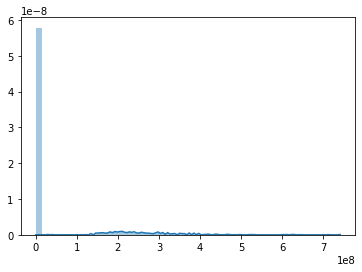

In [90]:
sns.distplot(df_nifty)

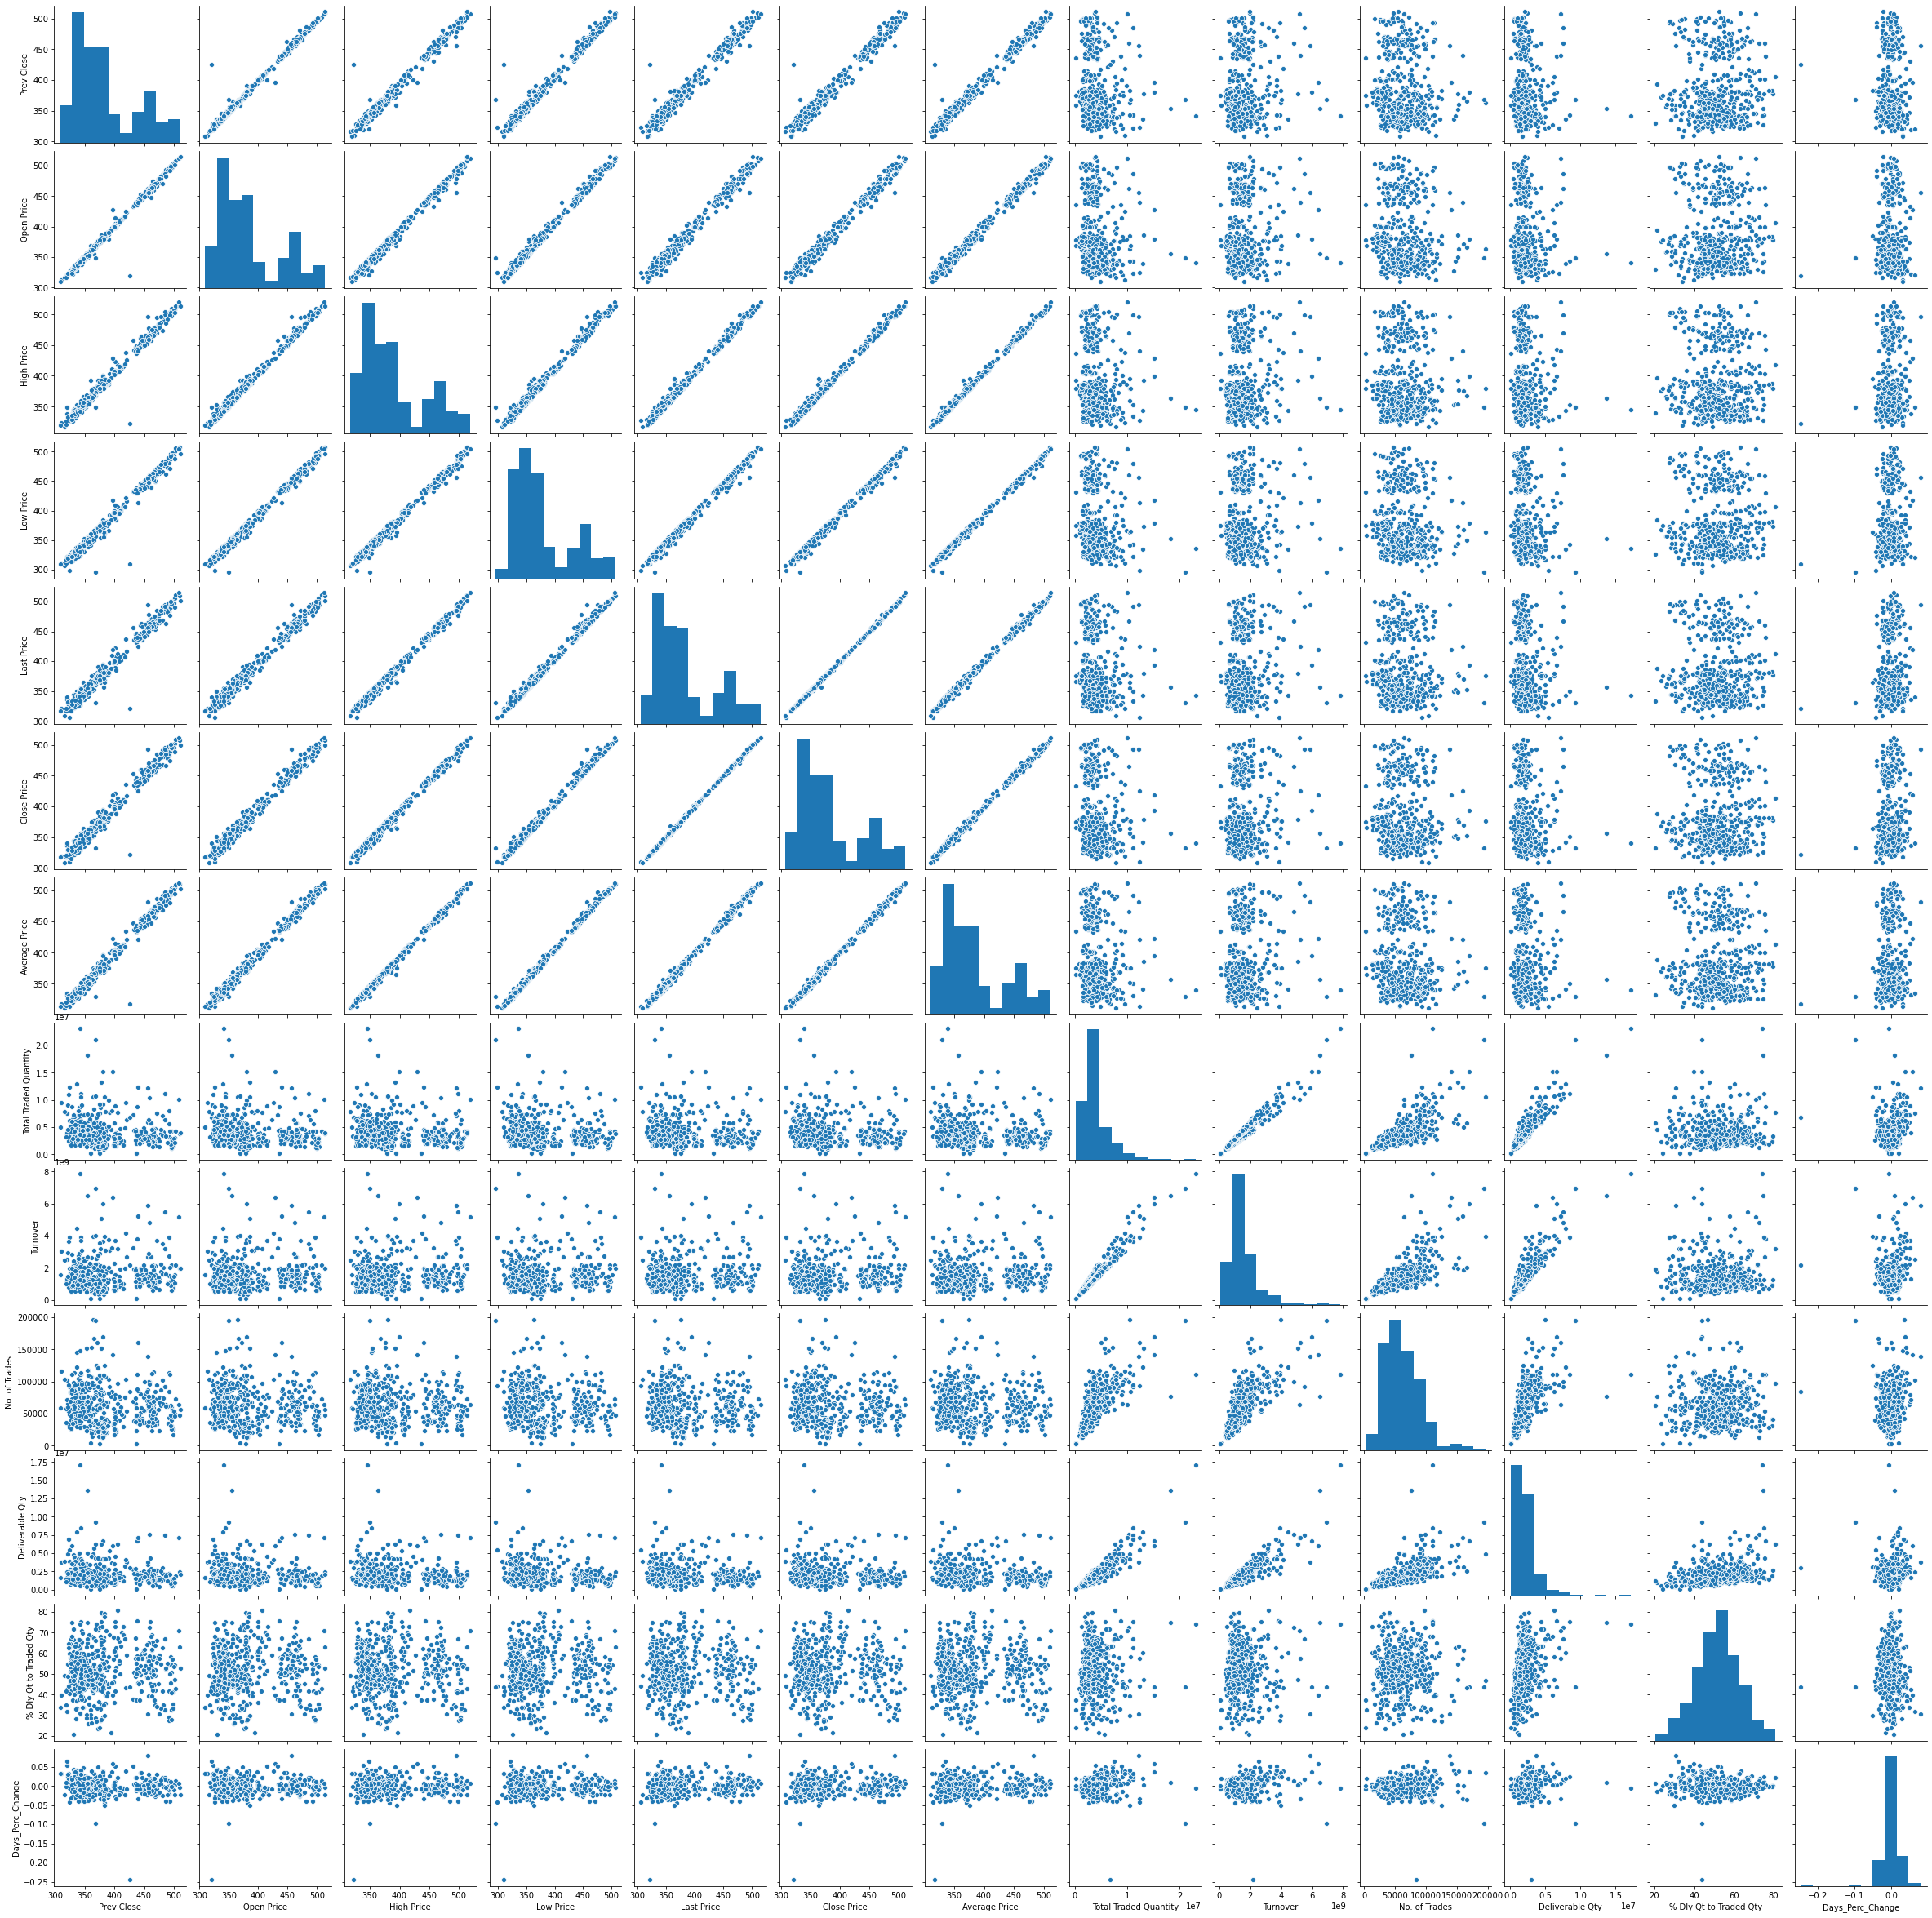

In [92]:
sns.pairplot(df_gail)

# The value of Beta comes out to be 0.7202 <1 that means GAIL stock has low volatility on monthly basis.

# Conclusions

# 1.If value of beta<0 (negative)-Inverse volatile than benchmark.That is investment moves in opposite direction to that of market.
# 2.If value of beta=0. Their is no correlation between chosen benchmark and itself.
# 3.If value of beta>0.Stock is more volatile than its benchmark.
# 4.If value of beta=1.Stock has the same volatility as the market

# 5.If value of beta<1. Stock is less volatile than the benchmark.